<a href="https://colab.research.google.com/github/kanchandhole/Data-Scientist/blob/main/Logistic_Regression_practical_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic
Regression, and prints the model accuracy.

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [293]:
from sklearn.datasets import load_iris

In [294]:
data = load_iris()

In [295]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [296]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [297]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [298]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [299]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [300]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [301]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [302]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [303]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [304]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [305]:
df.target.unique()

array([0, 1, 2])

In [306]:
df = df[df['target'] != 2]

In [307]:
df.target.unique()

array([0, 1])

In [308]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [309]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [310]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [311]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


In [312]:
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.20 , random_state= 1)

In [313]:
X_train.shape , X_test.shape , y_train.shape, y_test.shape

((80, 4), (20, 4), (80,), (20,))

In [314]:
model = LogisticRegression()

In [315]:
model.fit(X_train , y_train)

LogisticRegression()

In [316]:
y_pred = model.predict(X_test)

In [317]:
model.predict_proba(X_test)

array([[0.04043262, 0.95956738],
       [0.01046123, 0.98953877],
       [0.98706759, 0.01293241],
       [0.05440516, 0.94559484],
       [0.1383348 , 0.8616652 ],
       [0.97966131, 0.02033869],
       [0.98204504, 0.01795496],
       [0.03292232, 0.96707768],
       [0.03380573, 0.96619427],
       [0.00850516, 0.99149484],
       [0.02466034, 0.97533966],
       [0.97515854, 0.02484146],
       [0.00517837, 0.99482163],
       [0.00238366, 0.99761634],
       [0.0077453 , 0.9922547 ],
       [0.98619342, 0.01380658],
       [0.96597536, 0.03402464],
       [0.94907826, 0.05092174],
       [0.00735493, 0.99264507],
       [0.97742977, 0.02257023]])

In [318]:
accuracy_score(y_test, y_pred)

1.0

**Q2**.Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')
and print the model accuracy.

In [319]:
from sklearn.linear_model import Lasso

In [320]:
Lasso_model = Lasso()

In [321]:
Lasso_model

Lasso()

In [322]:
Lasso_model.fit(X_train , y_train)

Lasso()

In [323]:
Lasso_y_pred = Lasso_model.predict(X_test)

In [324]:
from sklearn.metrics import r2_score
r2_lasso = r2_score(y_test, Lasso_y_pred)

In [325]:
r2_lasso

-0.06510416666666652

Q3.Write a Python program to train Logistic Regression with L2 regularization (Ridge) using
LogisticRegression(penalty='l2'). Print model accuracy and coefficients.

In [326]:
from sklearn.linear_model import Ridge

In [327]:
Ridge_model = Ridge()

In [328]:
Ridge_model

Ridge()

In [329]:
Ridge_model.fit(X_train , y_train)

Ridge()

In [330]:
Ridge_y_pred = Ridge_model.predict(X_test)

In [331]:
Ridge_score = r2_score(y_test, Ridge_y_pred)

In [332]:
Ridge_score

0.9580003599705186

**Q4.**Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')

In [333]:
from sklearn.linear_model import ElasticNet

In [334]:
ElasticNet_model = ElasticNet()

In [335]:
ElasticNet_model.fit(X_train , y_train)

ElasticNet()

**Q5**.Write a Python program to train a Logistic Regression model for multiclass classification using
multi_class='ovr'.

In [336]:
from sklearn.datasets import make_classification

In [337]:
X, y = make_classification(n_samples=1000, n_features= 10, n_redundant=5, n_informative=5, n_classes=3, random_state=42)

In [338]:
X

array([[ 2.59014356, -3.42407256,  0.26830895, ..., -0.4075564 ,
         2.00889958,  0.91176128],
       [-0.18964388,  1.18915349,  1.33715288, ...,  0.75174259,
        -0.93616979, -0.0406729 ],
       [ 2.33823479,  1.73171672, -2.9554549 , ..., -6.11310542,
         2.56981847,  0.49067355],
       ...,
       [-5.0147105 ,  2.6321196 , -1.85549514, ...,  0.2517947 ,
        -1.09326259, -2.72779634],
       [-1.59943891,  1.68834032,  1.06411267, ...,  0.93209456,
        -1.11081933, -1.08072112],
       [ 2.89511603, -4.213598  ,  1.43221441, ...,  2.97446066,
        -0.86821862,  0.73856138]])

In [339]:
y

array([0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 0,
       0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2,
       2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1,
       2, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2,
       0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       0, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2,
       1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2,
       0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1,

In [340]:
X_train, X_test , y_train, y_test = train_test_split(X,y , test_size =0.2 , random_state=42)

In [341]:
from sklearn.linear_model import LogisticRegression

In [342]:
model = LogisticRegression(multi_class= 'ovr',solver='lbfgs') #ovr(one versus rest)

In [343]:
model

LogisticRegression(multi_class='ovr')

In [344]:
model.fit(X_train , y_train)

LogisticRegression(multi_class='ovr')

**Q6.**Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
Regression. Print the best parameters and accuracy.

In [345]:
from sklearn.datasets import make_classification

In [346]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=10, n_informative=5, random_state=42)

In [347]:
X

array([[ 1.12510039,  1.17812384,  0.49351604, ...,  1.35732466,
         0.9660408 , -1.98113862],
       [-0.56464086,  3.6386291 , -1.52241469, ..., -0.89025442,
         1.43882638, -3.82874758],
       [ 0.51631285,  2.16542633, -0.62848571, ..., -1.95817543,
        -0.34880315, -1.8041241 ],
       ...,
       [ 1.65015307, -0.69216458, -2.04920577, ..., -1.30257748,
        -1.28550452,  3.32856934],
       [-1.18660302, -1.41459786, -0.12151968, ..., -1.42146469,
        -0.02833985,  3.41393228],
       [ 0.78867591, -0.22254747,  0.32856985, ..., -1.29103957,
        -2.33817245,  2.03602059]])

In [348]:
y

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,

In [349]:
from sklearn.model_selection import GridSearchCV

In [350]:
params = {"penalty": ("l1", "l2", "elasticnet"), 'C': [1, 2, 10, 20, 30, 40]}

In [351]:
params

{'penalty': ('l1', 'l2', 'elasticnet'), 'C': [1, 2, 10, 20, 30, 40]}

In [352]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [353]:
clf = GridSearchCV(classifier, param_grid=params, cv = 5, verbose=2)
clf

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 10, 20, 30, 40],
                         'penalty': ('l1', 'l2', 'elasticnet')},
             verbose=2)

In [354]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.1s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ............................C=1, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=1, penalt

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 10, 20, 30, 40],
                         'penalty': ('l1', 'l2', 'elasticnet')},
             verbose=2)

In [355]:
clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [356]:
clf.best_score_

np.float64(0.67875)

**Q7.**Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the
average accuracy.

In [357]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

In [358]:
cv = KFold(n_splits=5)

In [359]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [360]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv = cv, scoring='accuracy')

In [361]:
scores

array([0.70625, 0.65   , 0.675  , 0.7125 , 0.6625 ])

**Q8.**Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its
accuracy

In [362]:
from google.colab import files

In [442]:
uploaded = files.upload()

Saving Car Sale.csv to Car Sale (1).csv


In [363]:
df = pd.read_csv('Car Sale.csv')

In [364]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [365]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [366]:
df.duplicated().sum()

np.int64(0)

In [367]:
df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [368]:
# Assume the last column is the target
X = df['Gender']  # Features
y = df['Transmission']   # Target

In [369]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.20 , random_state = 42)

In [370]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((19124,), (4782,), (19124,), (4782,))

In [371]:
from sklearn.linear_model import LogisticRegression

In [372]:
model = LogisticRegression(max_iter=1000)

In [373]:
model

LogisticRegression(max_iter=1000)

**Q9.**Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
Logistic Regression. Print the best parameters and accuracy.

In [374]:
from sklearn.datasets import make_classification

In [375]:
X,y = make_classification(n_samples=1000, n_classes=2, n_features =10, n_redundant=5, random_state = 42)

In [376]:
X

array([[ 0.69882842, -0.44285432,  0.72931996, ..., -1.31683344,
        -0.64864373,  0.42097294],
       [ 0.26536235, -0.78334361,  0.95712643, ..., -1.91880998,
        -0.78862011, -0.58275866],
       [ 0.50558924,  1.40244047,  0.44260835, ...,  0.77694065,
        -0.91139178,  1.48911311],
       ...,
       [-0.12545426,  0.15220661,  0.35270269, ..., -0.29130273,
        -0.42719111,  0.32787952],
       [ 1.46219594, -0.74694724, -0.24131663, ..., -0.40692179,
         0.4914257 ,  0.44863576],
       [ 0.29497146,  0.18671714, -0.41873258, ...,  0.69234812,
         0.39333835, -1.49725765]])

In [377]:
y

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,

In [378]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state =1)

In [379]:
from sklearn.model_selection import RandomizedSearchCV

In [380]:
random_model = RandomizedSearchCV(param_distributions=params, estimator=classifier, cv=5, verbose=2)

In [381]:
random_model

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 2, 10, 20, 30, 40],
                                        'penalty': ('l1', 'l2', 'elasticnet')},
                   verbose=2)

In [382]:
random_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ............................C=2, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=2, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=2, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=2, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=2, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=1, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=1, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=1, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=1, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=1, penalty=elasticnet; total time=   0.0s
[CV] END ...................................C=30, penalty=l2; total time=   0.0s
[CV] END ...................................C=30

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 2, 10, 20, 30, 40],
                                        'penalty': ('l1', 'l2', 'elasticnet')},
                   verbose=2)

In [383]:
random_model.best_params_

{'penalty': 'l2', 'C': 30}

In [384]:
from sklearn.metrics import accuracy_score

In [385]:
y_pred = random_model.predict(X_test)

In [386]:
accuracy_score(y_test, y_pred)

0.88

**Q10.**Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

In [387]:
from sklearn.datasets import make_classification
X,y =  make_classification(n_samples=1000, n_features=10, n_redundant=5, n_informative=5, n_classes=3, random_state=1)

In [388]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)

In [389]:
model = LogisticRegression(multi_class='ovr', solver = 'lbfgs')

In [390]:
model

LogisticRegression(multi_class='ovr')

In [391]:
model.fit(X_train , y_train)

LogisticRegression(multi_class='ovr')

In [392]:
y_pred = model.predict(X_test)

In [393]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6933333333333334

**Q11.**Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
classification.

In [394]:
from sklearn.datasets import load_breast_cancer
# Load binary classification dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [396]:
# Logistic Regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [397]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


**Q12.**Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,
Recall, and F1-Score.

In [398]:
# Load binary classification dataset
data = load_breast_cancer()
X = data.data
y = data.target  # Binary target: 0 or 1

In [399]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [400]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [401]:
y_pred = model.predict(X_test)

In [402]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [403]:
# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")

Precision: 0.95
Recall:    0.99
F1-Score:  0.97


**Q13.**Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
improve model performance.

In [404]:
# Step 1: Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)

In [405]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [406]:
# Step 3: Train Logistic Regression without class weights
model_default = LogisticRegression()
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)

In [407]:
# Step 4: Train Logistic Regression with class weights
model_weighted = LogisticRegression(class_weight='balanced', max_iter=1000)
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

In [408]:
# Step 5: Evaluate performance
def evaluate_model(y_true, y_pred, label):
    print(f"\n{label}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.2f}")
    print(f"F1-Score:  {f1_score(y_true, y_pred):.2f}")

In [409]:
evaluate_model(y_test, y_pred_default, "Without Class Weights")
evaluate_model(y_test, y_pred_weighted, "With Class Weights")


Without Class Weights
Precision: 0.80
Recall:    0.50
F1-Score:  0.62

With Class Weights
Precision: 0.41
Recall:    0.88
F1-Score:  0.56


**Q14.**Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and
evaluate performance.

In [410]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

In [411]:
# Step 1: Handle missing values
# Drop columns with too many missing values
titanic.drop(columns=['deck'], inplace=True)

In [412]:
# Fill missing age with median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

In [413]:
# Fill missing embark_town with the most common value
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

In [414]:
# Drop rows with missing 'embarked'
titanic.dropna(subset=['embarked'], inplace=True)

In [415]:
# Step 2: Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'
data = titanic[features + [target]].copy()

In [416]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical variables to numeric
label_encoders = {}
for col in ['sex', 'embarked']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [417]:
# Step 3: Train/test split
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [418]:
# Step 4: Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [419]:
# Step 5: Predict and evaluate
y_pred = model.predict(X_test)

In [420]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy:  0.7752808988764045
Precision: 0.6835443037974683
Recall:    0.782608695652174
F1 Score:  0.7297297297297297


**Q15.**Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
model. Evaluate its accuracy and compare results with and without scaling.

In [421]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [422]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [423]:
# Without Feature Scaling
model_no_scaling = LogisticRegression()
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

In [424]:
from sklearn.preprocessing import StandardScaler
#With Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [425]:
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

In [426]:
print(f"Accuracy WITHOUT Scaling: {acc_no_scaling:.4f}")
print(f"Accuracy WITH Scaling:    {acc_scaled:.4f}")

Accuracy WITHOUT Scaling: 0.9561
Accuracy WITH Scaling:    0.9737


**Q16**.Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.

In [427]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_redundant=5, n_informative=5, n_classes=2, random_state=1)

In [428]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [429]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [430]:
model.fit(X_train , y_train)

LogisticRegression()

In [431]:
y_pred = model.predict(X_test)

In [432]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1] #probability of one class
y_pred_proba

array([0.98074543, 0.1630346 , 0.28836826, 0.13404523, 0.55118737,
       0.093381  , 0.96196454, 0.30121948, 0.12350803, 0.95731226,
       0.08778761, 0.42049714, 0.72313926, 0.23255511, 0.58121438,
       0.66837244, 0.94905128, 0.85972623, 0.97062375, 0.07234521,
       0.44982165, 0.95676726, 0.81009427, 0.10033704, 0.90917135,
       0.55589431, 0.14145472, 0.4616435 , 0.50964656, 0.17344476,
       0.24931498, 0.76014755, 0.09988604, 0.64112515, 0.95883863,
       0.9780211 , 0.98800651, 0.0543648 , 0.03435789, 0.46141478,
       0.08374178, 0.35333259, 0.02083056, 0.41419338, 0.26807876,
       0.17827763, 0.10715494, 0.37105347, 0.28588311, 0.05294433,
       0.13359114, 0.04523728, 0.62836506, 0.97984677, 0.59864183,
       0.10748243, 0.07895498, 0.17213621, 0.9844883 , 0.96882693,
       0.99515672, 0.90155236, 0.87722561, 0.36500043, 0.94415526,
       0.19466362, 0.06183406, 0.09986673, 0.45158351, 0.72166411,
       0.25229704, 0.02143247, 0.89969779, 0.5412839 , 0.98427

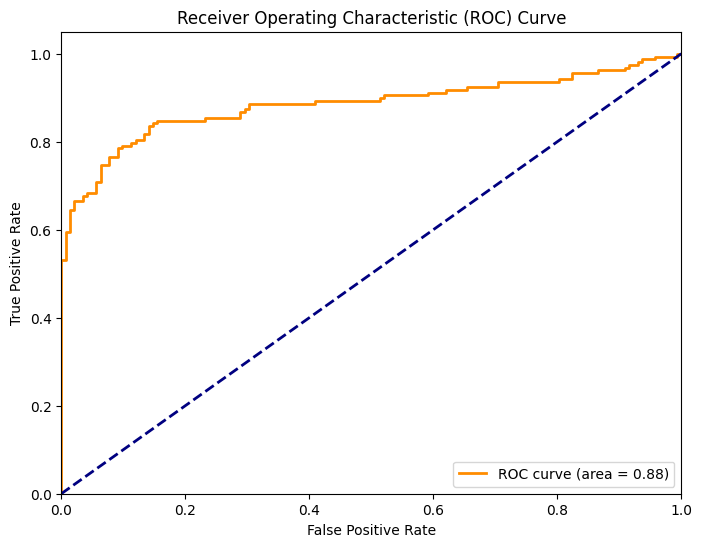

In [433]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Q17.**Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate
accuracy.

In [434]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_redundant=5, n_informative=5, n_classes=2, random_state=1)

In [435]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size =0.20, random_state =1 )

In [436]:
from sklearn.linear_model import LogisticRegression

In [437]:
model =LogisticRegression(C=0.5)

In [438]:
model

LogisticRegression(C=0.5)

In [439]:
model.fit(X_train , y_train)

LogisticRegression(C=0.5)

In [440]:
y_pred = model.predict(X_test)

In [441]:
accuracy_score(y_test , y_pred)

0.825

**Q18.** Write a Python program to train Logistic Regression and identify important features based on model
coefficients.

In [443]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [444]:
# Step 1: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [445]:
# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [447]:
# Step 3: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [448]:
# Step 4: Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [449]:
# Step 5: Get feature importances (coefficients)
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)

In [452]:
y_pred = model.predict(X_test_scaled)

In [450]:
# Step 6: Display top features
print("Top 10 Important Features in Logistic Regression:")
print(feature_importance.head(10))

Top 10 Important Features in Logistic Regression:
worst texture           1.350606
radius error            1.268178
worst symmetry          1.208200
mean concave points     1.119804
worst concavity         0.943053
area error              0.907186
worst radius            0.879840
worst area              0.841846
mean concavity          0.801458
worst concave points    0.778217
dtype: float64


**Q19.**Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa
Score.

In [453]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

Cohen's Kappa Score: 0.9437


**Q20.** Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary
classificatio.

In [456]:
from sklearn.metrics import precision_recall_curve, average_precision_score
y_scores = model.predict_proba(X_test_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

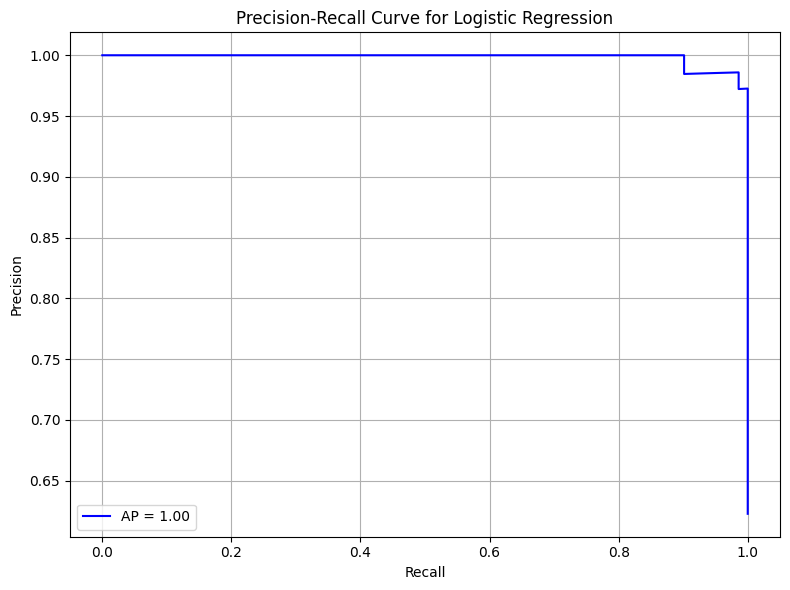

In [457]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Q21.**Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare
their accuracy.

In [458]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [459]:
data = load_breast_cancer()
X = data.data
y = data.target

In [460]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [461]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [462]:
# Solvers to compare
solvers = ['liblinear', 'saga', 'lbfgs']
results = {}

In [463]:
# Train and evaluate models with different solvers
for solver in solvers:
    try:
        model = LogisticRegression(solver=solver, max_iter=10000)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        results[solver] = accuracy
    except Exception as e:
        results[solver] = f"Error: {e}"


In [464]:
# Display results
print("Accuracy comparison of Logistic Regression solvers:\n")
for solver, acc in results.items():
    print(f"Solver: {solver:10} --> Accuracy: {acc}")

Accuracy comparison of Logistic Regression solvers:

Solver: liblinear  --> Accuracy: 0.9736842105263158
Solver: saga       --> Accuracy: 0.9736842105263158
Solver: lbfgs      --> Accuracy: 0.9736842105263158


**Q22.**Write a Python program to train Logistic Regression and evaluate its performance using Matthews
Correlation Coefficient (MCC).

In [465]:
y_pred = model.predict(X_test)

In [466]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Matthews Correlation Coefficient (MCC): 0.0000


**Q23.**Write a Python program to train Logistic Regression on both raw and standardized data. Compare their
accuracy to see the impact of feature scaling.

In [467]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [468]:
# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [469]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [470]:
# Step 3: Logistic Regression on raw data
model_raw = LogisticRegression(max_iter=10000)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

In [471]:
# Step 4: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [472]:
# Step 5: Logistic Regression on scaled data
model_scaled = LogisticRegression(max_iter=10000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

In [473]:
# Step 6: Compare accuracies
print(f"Accuracy on Raw Data:        {acc_raw:.4f}")
print(f"Accuracy on Standardized Data: {acc_scaled:.4f}")


Accuracy on Raw Data:        0.9561
Accuracy on Standardized Data: 0.9737


**Q24.**Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using
cross-validation.

In [474]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [475]:
# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [476]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [477]:
# Step 3: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [478]:
# Step 4: Define Logistic Regression and parameter grid
logreg = LogisticRegression(max_iter=10000)
param_grid = {'C': np.logspace(-4, 4, 10)}  # Test C values from 0.0001 to 10000

In [479]:
# Step 5: Grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='accuracy')

In [480]:
# Step 6: Best C and test accuracy
best_c = grid_search.best_params_['C']
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_scaled, y_test)

In [481]:
print(f"Best C (Regularization Strength): {best_c}")
print(f"Test Accuracy with Best C:        {test_accuracy:.4f}")

Best C (Regularization Strength): 2.782559402207126
Test Accuracy with Best C:        0.9737


**Q25.**Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to
make predictions.

In [483]:
import joblib
joblib.dump(model, 'logistic_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [484]:

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [485]:
loaded_model = joblib.load('logistic_model.joblib')
loaded_scaler = joblib.load('scaler.joblib')

In [486]:
#Make predictions using the loaded model
sample_input = X_test[0].reshape(1, -1)  # Use a single test example
scaled_input = loaded_scaler.transform(sample_input)
prediction = loaded_model.predict(scaled_input)

In [487]:
print(f"Prediction for the first test sample: {prediction[0]} (Actual: {y_test[0]})")

Prediction for the first test sample: 1 (Actual: 1)
